In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
path = 'C:\\Users\\rhasan\\Downloads\\Tensorflow-Bootcamp\\05-Autoencoders\\anonymized_data.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
df.columns

Index(['EJWY', 'VALM', 'EGXO', 'HTGR', 'SKRF', 'NNSZ', 'NYLC', 'GWID', 'TVUT',
       'CJHI', 'NVFW', 'VLBG', 'IDIX', 'UVHN', 'IWOT', 'LEMB', 'QMYY', 'XDGR',
       'ODZS', 'LNJS', 'WDRT', 'LKKS', 'UOBF', 'VBHE', 'FRWU', 'NDYZ', 'QSBO',
       'JDUB', 'TEVK', 'EZTM', 'Label'],
      dtype='object')

In [6]:
df.head()

,EJWY,VALM,EGXO,HTGR,SKRF,NNSZ,NYLC,GWID,TVUT,CJHI,...,LKKS,UOBF,VBHE,FRWU,NDYZ,QSBO,JDUB,TEVK,EZTM,Label
0,-2.032145,1.019576,-9.658715,-6.210495,3.156823,7.457850,-5.313357,8.508296,3.959194,-5.246654,...,-2.209663,-10.340123,-7.697555,-5.932752,10.872688,0.081321,1.276316,5.281225,-0.516447,0.0
1,8.306217,6.649376,-0.960333,-4.094799,8.738965,-3.458797,7.016800,6.692765,0.898264,9.337643,...,0.851793,-9.678324,-6.071795,1.428194,-8.082792,-0.557089,-7.817282,-8.686722,-6.953100,1.0
2,6.570842,6.985462,-1.842621,-1.569599,10.039339,-3.623026,8.957619,7.577283,1.541255,7.161509,...,1.376085,-8.971164,-5.302191,2.898965,-8.746597,-0.520888,-7.350999,-8.925501,-7.051179,1.0
3,-1.139972,0.579422,-9.526530,-5.744928,4.834355,5.907235,-4.804137,6.798810,5.403670,-7.642857,...,0.270571,-8.640988,-8.105419,-5.079015,9.351282,0.641759,1.898083,3.904671,1.453499,0.0
4,-1.738104,0.234729,-11.558768,-7.181332,4.189626,7.765274,-2.189083,7.239925,3.135602,-6.211390,...,-0.013973,-9.437110,-6.475267,-5.708377,9.623080,1.802899,1.903705,4.188442,1.522362,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 31 columns):
EJWY     500 non-null float64
VALM     500 non-null float64
EGXO     500 non-null float64
HTGR     500 non-null float64
SKRF     500 non-null float64
NNSZ     500 non-null float64
NYLC     500 non-null float64
GWID     500 non-null float64
TVUT     500 non-null float64
CJHI     500 non-null float64
NVFW     500 non-null float64
VLBG     500 non-null float64
IDIX     500 non-null float64
UVHN     500 non-null float64
IWOT     500 non-null float64
LEMB     500 non-null float64
QMYY     500 non-null float64
XDGR     500 non-null float64
ODZS     500 non-null float64
LNJS     500 non-null float64
WDRT     500 non-null float64
LKKS     500 non-null float64
UOBF     500 non-null float64
VBHE     500 non-null float64
FRWU     500 non-null float64
NDYZ     500 non-null float64
QSBO     500 non-null float64
JDUB     500 non-null float64
TEVK     500 non-null float64
EZTM     500 non-null flo

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler()

In [10]:
feature = df.drop('Label', axis=1)

In [11]:
label = df['Label']

In [13]:
feature.head()

,EJWY,VALM,EGXO,HTGR,SKRF,NNSZ,NYLC,GWID,TVUT,CJHI,...,WDRT,LKKS,UOBF,VBHE,FRWU,NDYZ,QSBO,JDUB,TEVK,EZTM
0,-2.032145,1.019576,-9.658715,-6.210495,3.156823,7.457850,-5.313357,8.508296,3.959194,-5.246654,...,4.048589,-2.209663,-10.340123,-7.697555,-5.932752,10.872688,0.081321,1.276316,5.281225,-0.516447
1,8.306217,6.649376,-0.960333,-4.094799,8.738965,-3.458797,7.016800,6.692765,0.898264,9.337643,...,4.341376,0.851793,-9.678324,-6.071795,1.428194,-8.082792,-0.557089,-7.817282,-8.686722,-6.953100
2,6.570842,6.985462,-1.842621,-1.569599,10.039339,-3.623026,8.957619,7.577283,1.541255,7.161509,...,4.028944,1.376085,-8.971164,-5.302191,2.898965,-8.746597,-0.520888,-7.350999,-8.925501,-7.051179
3,-1.139972,0.579422,-9.526530,-5.744928,4.834355,5.907235,-4.804137,6.798810,5.403670,-7.642857,...,3.974559,0.270571,-8.640988,-8.105419,-5.079015,9.351282,0.641759,1.898083,3.904671,1.453499
4,-1.738104,0.234729,-11.558768,-7.181332,4.189626,7.765274,-2.189083,7.239925,3.135602,-6.211390,...,3.799633,-0.013973,-9.437110,-6.475267,-5.708377,9.623080,1.802899,1.903705,4.188442,1.522362


In [15]:
label.head()

0    0.0
1    1.0
2    1.0
3    0.0
4    0.0
Name: Label, dtype: float64

In [16]:
scaled_data = scaler.fit_transform(feature)

    ## Linear Autoencoder

In [17]:
import tensorflow as tf

In [18]:
from tensorflow.contrib.layers import fully_connected

In [19]:
num_inputs = 30 #total feature columns
num_hidden = 2 #dimension presentation
num_outputs = num_inputs


learning_rate = 0.01

    ## Create Placeholder

In [20]:
X = tf.placeholder(tf.float32, shape=[None, num_inputs])

In [21]:
#Layers 
hidden = fully_connected(X, num_hidden, activation_fn=None)
outputs = fully_connected(hidden, num_outputs, activation_fn=None)

In [22]:
#Loss Function
loss = tf.reduce_mean(tf.square(outputs - X))

In [23]:
#Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

In [24]:
#Global Variable Init 
init = tf.global_variables_initializer()

In [41]:
#Running the session

num_steps = 10000

with tf.Session() as sess:
    sess.run(init)
    
    
    for iteration in range(num_steps):
        sess.run(train, feed_dict={X: scaled_data})

In [42]:
with tf.Session() as sess:
    sess.run(init)
    
    output_2d = hidden.eval(feed_dict={X: scaled_data})

In [43]:
output_2d.shape

(500, 2)

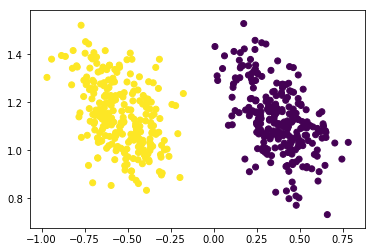

In [44]:
plt.scatter(output_2d[:,0],output_2d[:,1], c=df["Label"])

    ## Stacked Autoencoders

In [53]:
from tensorflow.examples.tutorials.mnist import input_data

In [54]:
mnist = input_data.read_data_sets("C:\\Users\\rhasan\\Downloads\\Tensorflow-Bootcamp\\03-Convolutional-Neural-Networks\\MNIST_data\\", one_hot=True)

Extracting C:\Users\rhasan\Downloads\Tensorflow-Bootcamp\03-Convolutional-Neural-Networks\MNIST_data\train-images-idx3-ubyte.gz
Extracting C:\Users\rhasan\Downloads\Tensorflow-Bootcamp\03-Convolutional-Neural-Networks\MNIST_data\train-labels-idx1-ubyte.gz
Extracting C:\Users\rhasan\Downloads\Tensorflow-Bootcamp\03-Convolutional-Neural-Networks\MNIST_data\t10k-images-idx3-ubyte.gz
Extracting C:\Users\rhasan\Downloads\Tensorflow-Bootcamp\03-Convolutional-Neural-Networks\MNIST_data\t10k-labels-idx1-ubyte.gz


In [55]:
tf.reset_default_graph()

In [56]:
#parameters
num_inputs = 784
neurons_hid1 = 392
neurons_hid2 = 196
neurons_hid3 = neurons_hid1
num_outputs = num_inputs


learning_rate = 0.01

In [57]:
actf = tf.nn.relu

In [58]:
X = tf.placeholder(tf.float32, shape=[None, num_inputs])

In [59]:
initializer = tf.variance_scaling_initializer()

In [60]:
w1 = tf.Variable(initializer([num_inputs, neurons_hid1]), dtype=tf.float32)
w2 = tf.Variable(initializer([neurons_hid1, neurons_hid2]), dtype=tf.float32)
w3 = tf.Variable(initializer([neurons_hid2, neurons_hid3]), dtype=tf.float32)
w4 = tf.Variable(initializer([neurons_hid3, num_outputs]), dtype=tf.float32)

In [61]:
b1 = tf.Variable(tf.zeros(neurons_hid1))
b2 = tf.Variable(tf.zeros(neurons_hid2))
b3 = tf.Variable(tf.zeros(neurons_hid3))
b4 = tf.Variable(tf.zeros(num_outputs))

In [62]:
act_func = tf.nn.relu

In [64]:
hid_layer1 = act_func(tf.matmul(X, w1) + b1)
hid_layer2 = act_func(tf.matmul(hid_layer1, w2) + b2)
hid_layer3 = act_func(tf.matmul(hid_layer2, w3) + b3)
output_layer = tf.matmul(hid_layer3, w4) + b4

In [65]:
loss = tf.reduce_mean(tf.square(output_layer - X))

In [66]:
optimizer = tf.train.AdamOptimizer(learning_rate)

In [67]:
train = optimizer.minimize(loss)

In [68]:
init = tf.global_variables_initializer()

In [69]:
saver1 = tf.train.Saver()

In [71]:
num_epochs = 5
batch_size = 100

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(num_epochs):
        
        num_batches = mnist.train.num_examples // batch_size
        
        for iteration in range(num_batches):
            
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(train, feed_dict={X: X_batch})
            
        training_loss = loss.eval(feed_dict={X: X_batch})   
        
        print("Epoch {} Complete. Training Loss: {}".format(epoch,training_loss))
     
    saver1.save(sess, "./stacked_autoencoder.ckpt1")

Epoch 0 Complete. Training Loss: 0.037249814718961716
Epoch 1 Complete. Training Loss: 0.036132145673036575
Epoch 2 Complete. Training Loss: 0.036727193742990494
Epoch 3 Complete. Training Loss: 0.036470651626586914
Epoch 4 Complete. Training Loss: 0.038341861218214035


In [72]:
num_test_images = 20

with tf.Session() as sess:
    
    saver1.restore(sess,"./stacked_autoencoder.ckpt1")
    
    results = output_layer.eval(feed_dict={X:mnist.test.images[:num_test_images]})

INFO:tensorflow:Restoring parameters from ./stacked_autoencoder.ckpt1


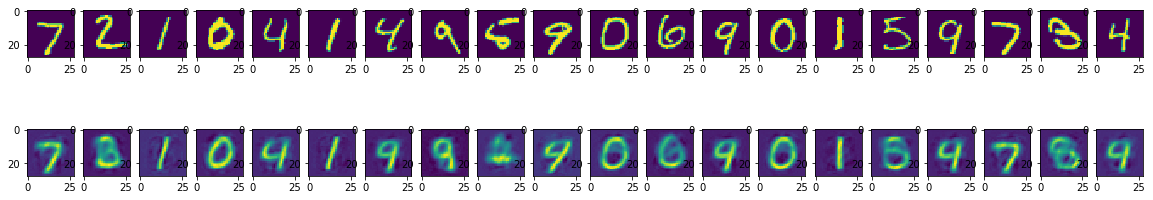

In [74]:
# Compare original images with their reconstructions
f, a = plt.subplots(2, 20, figsize=(20, 4))
for i in range(num_test_images):
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    a[1][i].imshow(np.reshape(results[i], (28, 28)))

## Time Series

In [75]:
path = 'C:\\Users\\rhasan\\Downloads\\Tensorflow-Bootcamp\\04-Recurrent-Neural-Networks\\monthly-milk-production.csv'

In [76]:
import pandas as pd

In [79]:
milk = pd.read_csv(path, index_col='Month')

In [80]:
milk.head()

,Milk Production
Month,
1962-01-01 01:00:00,589.0
1962-02-01 01:00:00,561.0
1962-03-01 01:00:00,640.0
1962-04-01 01:00:00,656.0
1962-05-01 01:00:00,727.0


In [82]:
milk.index = pd.to_datetime(milk.index)

In [83]:
milk.index

DatetimeIndex(['1962-01-01 01:00:00', '1962-02-01 01:00:00',
               '1962-03-01 01:00:00', '1962-04-01 01:00:00',
               '1962-05-01 01:00:00', '1962-06-01 01:00:00',
               '1962-07-01 01:00:00', '1962-08-01 01:00:00',
               '1962-09-01 01:00:00', '1962-10-01 01:00:00',
               ...
               '1975-03-01 01:00:00', '1975-04-01 01:00:00',
               '1975-05-01 01:00:00', '1975-06-01 01:00:00',
               '1975-07-01 01:00:00', '1975-08-01 01:00:00',
               '1975-09-01 01:00:00', '1975-10-01 01:00:00',
               '1975-11-01 01:00:00', '1975-12-01 01:00:00'],
              dtype='datetime64[ns]', name='Month', length=168, freq=None)

In [85]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

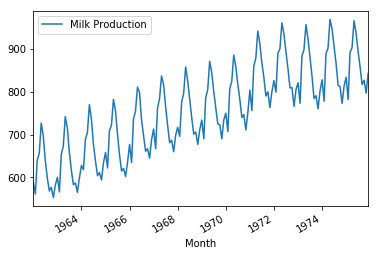

In [86]:
milk.plot()

In [88]:
milk.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 01:00:00 to 1975-12-01 01:00:00
Data columns (total 1 columns):
Milk Production    168 non-null float64
dtypes: float64(1)
memory usage: 7.6 KB


In [89]:
train = milk.head(156)

In [90]:
test = milk.tail(12)

In [91]:
from sklearn.preprocessing import MinMaxScaler

In [92]:
scaler = MinMaxScaler()

In [93]:
train_scaled = scaler.fit_transform(train)

In [94]:
test_scaled = scaler.transform(test)

In [95]:
train_scaled

array([[ 0.08653846],
       [ 0.01923077],
       [ 0.20913462],
       [ 0.24759615],
       [ 0.41826923],
       [ 0.34615385],
       [ 0.20913462],
       [ 0.11057692],
       [ 0.03605769],
       [ 0.05769231],
       [ 0.        ],
       [ 0.06971154],
       [ 0.11298077],
       [ 0.03125   ],
       [ 0.24038462],
       [ 0.28846154],
       [ 0.45432692],
       [ 0.39182692],
       [ 0.25721154],
       [ 0.15384615],
       [ 0.07211538],
       [ 0.08173077],
       [ 0.02884615],
       [ 0.10817308],
       [ 0.18028846],
       [ 0.15625   ],
       [ 0.32451923],
       [ 0.36538462],
       [ 0.52163462],
       [ 0.43990385],
       [ 0.30048077],
       [ 0.20673077],
       [ 0.12259615],
       [ 0.13942308],
       [ 0.09855769],
       [ 0.19471154],
       [ 0.25240385],
       [ 0.16586538],
       [ 0.375     ],
       [ 0.40625   ],
       [ 0.55048077],
       [ 0.48798077],
       [ 0.35817308],
       [ 0.24038462],
       [ 0.14903846],
       [ 0

In [96]:
test_scaled

array([[ 0.67548077],
       [ 0.55048077],
       [ 0.81490385],
       [ 0.84134615],
       [ 0.99278846],
       [ 0.92307692],
       [ 0.82451923],
       [ 0.73317308],
       [ 0.63461538],
       [ 0.65865385],
       [ 0.58653846],
       [ 0.69711538]])

In [97]:
def next_batch(training_data,batch_size,steps):
    
    
    # Grab a random starting point for each batch
    rand_start = np.random.randint(0,len(training_data)-steps) 

    # Create Y data for time series in the batches
    y_batch = np.array(training_data[rand_start:rand_start+steps+1]).reshape(1,steps+1)

    return y_batch[:, :-1].reshape(-1, steps, 1), y_batch[:, 1:].reshape(-1, steps, 1) 

In [98]:
import tensorflow as tf

In [99]:
num_inputs = 1
num_time_steps = 12
num_neurons = 100
num_outputs = 1

learning_rate = 0.03 
num_train_iterations = 4000
batch_size = 1

In [100]:
X = tf.placeholder(tf.float32, [None, num_time_steps, num_inputs])
y = tf.placeholder(tf.float32, [None, num_time_steps, num_outputs])

In [101]:
cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.contrib.rnn.BasicLSTMCell(num_units=num_neurons, activation=tf.nn.relu),
    output_size=num_outputs)

In [102]:
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

In [103]:
loss = tf.reduce_mean(tf.square(outputs - y)) # MSE
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train = optimizer.minimize(loss)

In [104]:
init = tf.global_variables_initializer()

In [105]:
saver = tf.train.Saver()

In [106]:
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.9)

In [107]:
with tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) as sess:
    sess.run(init)
    
    for iteration in range(num_train_iterations):
        
        X_batch, y_batch = next_batch(train_scaled,batch_size,num_time_steps)
        sess.run(train, feed_dict={X: X_batch, y: y_batch})
        
        if iteration % 100 == 0:
            
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
    
    # Save Model for Later
    saver.save(sess, "./ex_time_series_model1")

0 	MSE: 0.0866833
100 	MSE: 0.0100482
200 	MSE: 0.013016
300 	MSE: 0.0182767
400 	MSE: 0.0122359
500 	MSE: 0.00955857
600 	MSE: 0.00834624
700 	MSE: 0.00711997
800 	MSE: 0.00659309
900 	MSE: 0.0101639
1000 	MSE: 0.0120466
1100 	MSE: 0.00790211
1200 	MSE: 0.00901103
1300 	MSE: 0.00795784
1400 	MSE: 0.00846494
1500 	MSE: 0.00499733
1600 	MSE: 0.0172881
1700 	MSE: 0.00950072
1800 	MSE: 0.00800482
1900 	MSE: 0.00979081
2000 	MSE: 0.0146692
2100 	MSE: 0.00811415
2200 	MSE: 0.0144249
2300 	MSE: 0.00692984
2400 	MSE: 0.00626751
2500 	MSE: 0.00453266
2600 	MSE: 0.00931353
2700 	MSE: 0.00449118
2800 	MSE: 0.00638724
2900 	MSE: 0.00509396
3000 	MSE: 0.0054997
3100 	MSE: 0.00493535
3200 	MSE: 0.00382895
3300 	MSE: 0.00915318
3400 	MSE: 0.00574313
3500 	MSE: 0.00761918
3600 	MSE: 0.0139963
3700 	MSE: 0.00801098
3800 	MSE: 0.00559756
3900 	MSE: 0.00410495


In [108]:
with tf.Session() as sess:
    
    # Use your Saver instance to restore your saved rnn time series model
    saver.restore(sess, "./ex_time_series_model1")

    # Create a numpy array for your genreative seed from the last 12 months of the 
    # training set data. Hint: Just use tail(12) and then pass it to an np.array
    train_seed = list(train_scaled[-12:])
    
    ## Now create a for loop that 
    for iteration in range(12):
        X_batch = np.array(train_seed[-num_time_steps:]).reshape(1, num_time_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        train_seed.append(y_pred[0, -1, 0])

INFO:tensorflow:Restoring parameters from ./ex_time_series_model1


In [109]:
train_seed

[array([ 0.66105769]),
 array([ 0.54086538]),
 array([ 0.80769231]),
 array([ 0.83894231]),
 array([ 1.]),
 array([ 0.94711538]),
 array([ 0.85336538]),
 array([ 0.75480769]),
 array([ 0.62980769]),
 array([ 0.62259615]),
 array([ 0.52884615]),
 array([ 0.625]),
 0.65409774,
 0.64373374,
 0.74059319,
 0.65452063,
 0.69374013,
 0.64018923,
 0.53451616,
 0.4964321,
 0.45511806,
 0.42292592,
 0.40346459,
 0.38749743]

In [110]:
results = scaler.inverse_transform(np.array(train_seed[12:]).reshape(12,1))

In [111]:
results

array([[ 825.10467529],
       [ 820.79321289],
       [ 861.08673096],
       [ 825.28057861],
       [ 841.59588623],
       [ 819.31872559],
       [ 775.35870361],
       [ 759.51574707],
       [ 742.32910156],
       [ 728.93719482],
       [ 720.84130859],
       [ 714.19891357]], dtype=float32)

In [113]:
test['Generated'] = results

C:\Users\rhasan\AppData\Local\Continuum\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [114]:
test

,Milk Production,Generated
Month,,
1975-01-01 01:00:00,834.0,825.104675
1975-02-01 01:00:00,782.0,820.793213
1975-03-01 01:00:00,892.0,861.086731
1975-04-01 01:00:00,903.0,825.280579
1975-05-01 01:00:00,966.0,841.595886
1975-06-01 01:00:00,937.0,819.318726
1975-07-01 01:00:00,896.0,775.358704
1975-08-01 01:00:00,858.0,759.515747
1975-09-01 01:00:00,817.0,742.329102


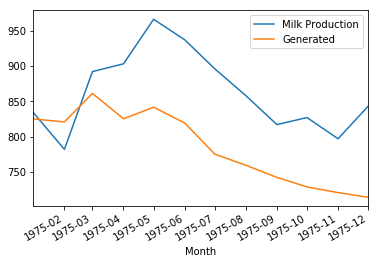

In [115]:
test.plot()